In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", context="talk")

%matplotlib inline

from IPython.display import HTML

In [84]:
VEHICLE_FILE = "vehicle.csv"
VEHICLE_FILE_DTYPES = {
    "VID":np.uint32, 
    "OZONE":np.uint16, 
    "DZONE":np.uint16,
    "START_TIME":np.float64,
    "END_TIME":np.float64,
    "TOT_TIME":np.float64,
    "DISTANCE":np.float64,
    "DELAY":np.float64,
    "CLASS":np.int8,
    "TYPE":np.int8,
    "TAG":np.int8
    
}

In [85]:
veh = pd.read_csv(VEHICLE_FILE, dtype=VEHICLE_FILE_DTYPES)

In [86]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6507524 entries, 0 to 6507523
Data columns (total 11 columns):
VID           uint32
OZONE         uint16
DZONE         uint16
START_TIME    float64
END_TIME      float64
TOT_TIME      float64
DISTANCE      float64
DELAY         float64
CLASS         int8
TYPE          int8
TAG           int8
dtypes: float64(5), int8(3), uint16(2), uint32(1)
memory usage: 316.5 MB


In [87]:
# index speeds up lookup by 100 times
veh = veh.set_index(['OZONE', 'DZONE']).sort_index()

### KPI-1. Average Commuting Travel Time/Peak Periods
Removing intrazonal trips

In [103]:
veh = veh.reset_index()
selector = veh.OZONE != veh.DZONE
veh_select = veh.loc[selector]

Average Commuting Travel Time in PM = 21.32 minutes


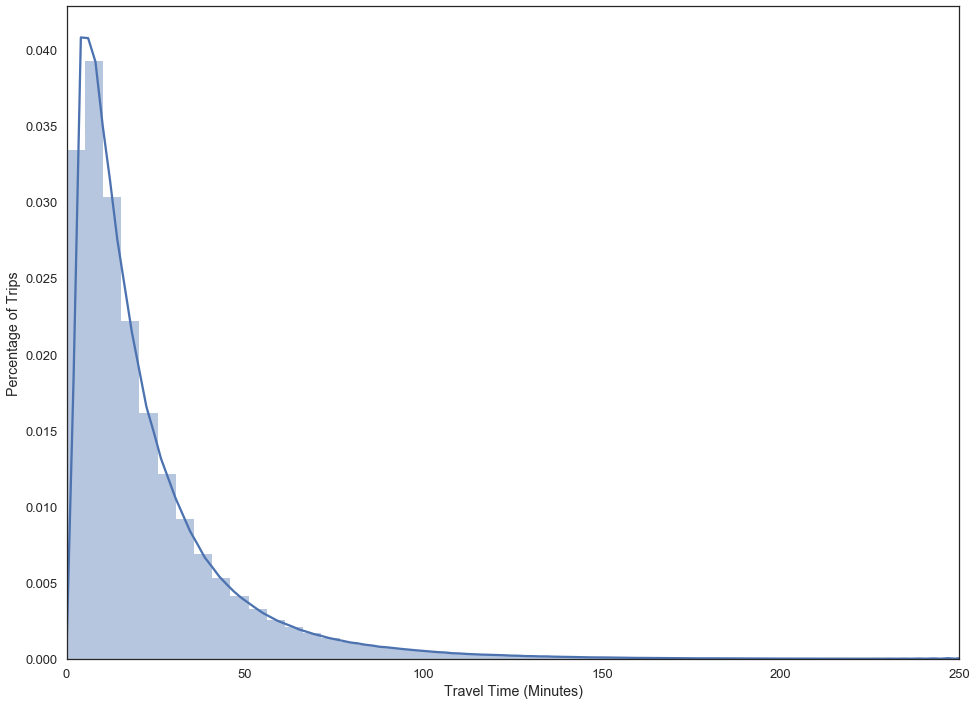

In [256]:
fig, ax = plt.subplots(figsize=(16,12))
# ax.hist(veh_select.TOT_TIME, bins=50);
sns.distplot(veh_select.TOT_TIME, bins=50, ax=ax)
ax.set_xlim((0,250))
ax.set_xlabel('Travel Time (Minutes)')
ax.set_ylabel('Percentage of Trips')
print("Average Commuting Travel Time in PM = {0:.2f} minutes".format(np.mean(veh_select.TOT_TIME)))

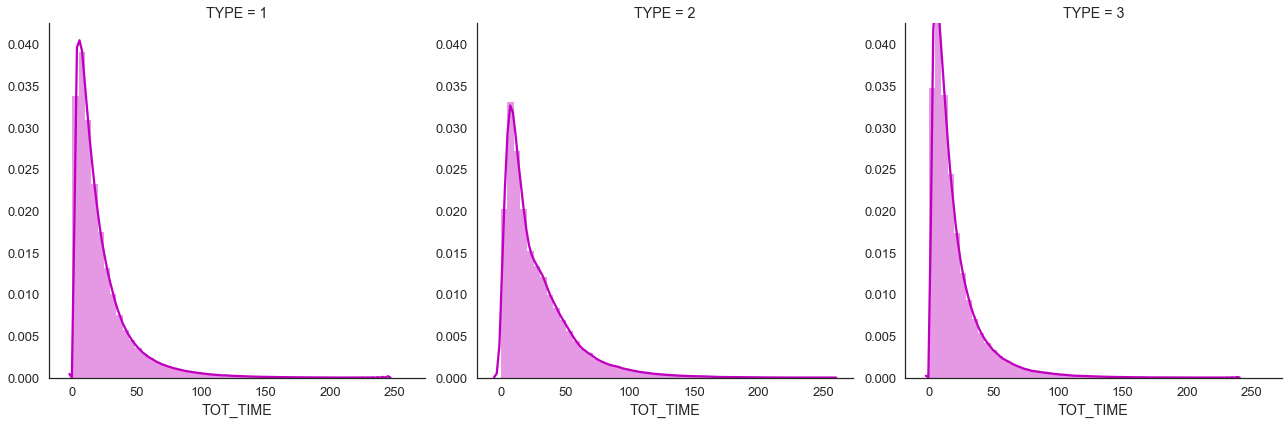

In [259]:
# Type 1 SOV; Type 2 Trucks; Type 3 HOV
g = sns.FacetGrid(veh_select, col="TYPE", size=6)
g = g.map(sns.distplot, "TOT_TIME", bins=50, color="m")

In [209]:
res = veh_select.groupby("TYPE")["TOT_TIME"].agg([("Count", 'count'), ("Average", np.mean), ("Std", np.std)])
HTML(res.to_html())

,Count,Average,Std
TYPE,,,
1,4573621,21.322511,21.927305
2,418947,28.126570,26.281377
3,1514881,19.440214,20.090246


### KPI-2 Average Commuting Travel Length/Peak Periods

Average Commuting Distance in PM = 9.56 miles


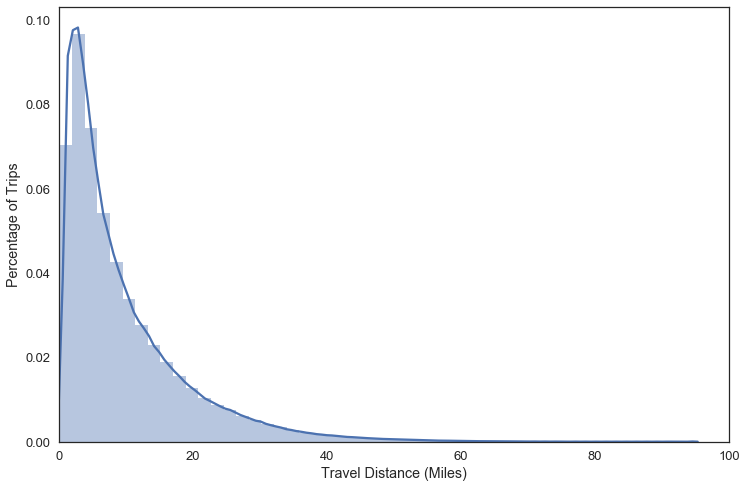

In [261]:
selector = veh.OZONE != veh.DZONE & (veh.TYPE != 2)
veh_select = veh.loc[selector]

fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(veh_select.DISTANCE, bins=50, ax=ax)
ax.set_xlim((0,100))
ax.set_xlabel('Travel Distance (Miles)')
ax.set_ylabel('Percentage of Trips')
# ax.hist(veh_select.DISTANCE, bins=50);
print("Average Commuting Distance in PM = {0:.2f} miles".format(np.mean(veh_select.DISTANCE)))

### KPI-3 Average Commute Travel Dollar Spent/peak periods

In [ ]:
selector = veh.OZONE != veh.DZONE & (veh.TYPE != 2)
veh_select = veh.loc[selector]
print("Average Commuting Distance in PM = {0:.2f} miles".format(np.mean(veh_select.DISTANCE)))

### KPI-4 Single Occupancy Ratio

In [173]:
SOV_VOLUME_FILE = "HGAC4_Link_SOV.csv"
HOV_VOLUME_FILE = "HGAC4_Link_HOV.csv"
ALL_VOLUME_FILE = "HGAC4_Link_ALL.csv"
VOLUME_FILE_DTYPES = {
    "A_NODE(f0)":np.uint32, 
    "B_NODE(f0)":np.uint32, 
    "DISTANCE(f2)":np.float64,
    "#STREET(c20)":str
}

In [191]:
link_volume_sov = pd.read_csv(SOV_VOLUME_FILE, dtype=VOLUME_FILE_DTYPES, index_col=False)
link_volume_hov = pd.read_csv(HOV_VOLUME_FILE, dtype=VOLUME_FILE_DTYPES, index_col=False)
link_volume_all = pd.read_csv(ALL_VOLUME_FILE, dtype=VOLUME_FILE_DTYPES, index_col=False)

In [175]:
link_volume_sov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45840 entries, 0 to 45839
Data columns (total 36 columns):
A_NODE(f0)       45840 non-null uint32
B_NODE(f0)       45840 non-null uint32
DISTANCE(f2)     45840 non-null float64
#STREET(c20)     45840 non-null object
#LENGTH(f0)      45840 non-null float64
#LTYPE(f0)       45840 non-null float64
#L_NODE(f0)      45840 non-null float64
#T_NODE(f0)      45840 non-null float64
#R_NODE(f0)      45840 non-null float64
#O1_NODE(f0)     45840 non-null float64
#O2_NODE(f0)     45840 non-null float64
#LANES(f0)       45840 non-null float64
#LBAYS(f0)       45840 non-null float64
#RBAYS(f0)       45840 non-null float64
#UTURN(f0)       45840 non-null float64
#SPEED(f0)       45840 non-null float64
#SPEEDADJ(f0)    45840 non-null float64
#SERFLOW(f0)     45840 non-null float64
#SATFLOW(f0)     45840 non-null float64
#GRADE(f0)       45840 non-null float64
#TFMODEL(f0)     45840 non-null float64
#GZONE1(f2)      45840 non-null float64
#GZONE2(f2)   

In [192]:
link_volume_sov = link_volume_sov.set_index(["A_NODE(f0)", "B_NODE(f0)"])
link_volume_hov = link_volume_hov.set_index(["A_NODE(f0)", "B_NODE(f0)"])
link_volume_all = link_volume_all.set_index(["A_NODE(f0)", "B_NODE(f0)"])

In [206]:
link_volume_sov["VMT"] = link_volume_sov["DISTANCE(f2)"] * link_volume_sov["#VOLUME(f0)"]
link_volume_hov["VMT"] = link_volume_hov["DISTANCE(f2)"] * link_volume_hov["#VOLUME(f0)"]
link_volume_all["VMT"] = link_volume_all["DISTANCE(f2)"] * link_volume_all["#VOLUME(f0)"]
link_veh_productivity = pd.concat([link_volume_sov.VMT, link_volume_hov.VMT], axis=1, keys=["SOV_VMT", "HOV_VMT"])

In [264]:
link_veh_productivity.to_csv("link_productivity.csv")

### KPI-6 % Managed Travel Lanes

In [265]:
link_volume_all['Lane_miles'] = link_volume_all["DISTANCE(f2)"]*link_volume_all["#LANES(f0)"]

In [268]:
selector = (link_volume_all["#TOLL(f2)"] > 0) | (link_volume_all["#HOT(f0)"] > 0)
managed_lanes = link_volume_all.loc[selector, ["#LTYPE(f0)", "Lane_miles"]]
managed_lanes.groupby("#LTYPE(f0)").agg([("Count", 'count'), ("Total Lane Miles", sum)])

Lane_miles                 
                Count Total Lane Miles
#LTYPE(f0)                            
3.0                81        21.253838
5.0                 1         2.217330
9.0                30        79.171200
10.0                3         0.397515

In [270]:
total_lane_miles = link_volume_all.loc[:, ["#LTYPE(f0)", "Lane_miles"]].groupby("#LTYPE(f0)").agg([("Count", 'count'), ("Total Lane Miles", sum)])
total_lane_miles

Lane_miles                 
                Count Total Lane Miles
#LTYPE(f0)                            
0.0             19806      7445.843640
1.0              1504      2430.494204
3.0              1921       448.470082
4.0                 2         0.408642
5.0             22102     14073.194537
9.0               388       741.345039
10.0              117       196.554762

### KPI-7 % Improvement in Highway Safety Index

In [204]:
# Compute total volumes by functional classifications
link_volume_all.groupby("#LTYPE(f0)")["#VOLUME(f0)"].agg([("Count", 'count'), ("Average Volume", np.mean)])

,Count,Average Volume
#LTYPE(f0),,
0.0,19806,306.156821
1.0,1504,34810.511968
3.0,1921,4902.435711
4.0,2,4774.000000
5.0,22102,4244.558818
9.0,388,17455.850515
10.0,117,6042.273504


### KPI-8 GHG Emissions (Total VMT)

In [207]:
link_volume_all.groupby("#LTYPE(f0)")["VMT"].agg([("Count", 'count'), ("Total VMT", sum)])

,Count,Total VMT
#LTYPE(f0),,
0.0,19806,2.716557e+06
1.0,1504,2.175362e+07
3.0,1921,1.996195e+06
4.0,2,2.071535e+03
5.0,22102,3.247716e+07
9.0,388,5.135656e+06
10.0,117,1.081310e+06


### KPI-9 Failing LOS Index

### KPI-12 Peak Congestion Index
Percent of lane miles congested by functional classification;
Congestion is desrribed by time ratio > 2.0

In [210]:
LINK_TRAVEL_TIME_FILE = 'OutLinkTravelTime_HGAC4_full.csv'

In [214]:
link_travel_time = pd.read_csv(LINK_TRAVEL_TIME_FILE, index_col=False)
link_travel_time = link_travel_time.iloc[:, :-1]           # Remove the last column which is ALL nan 

In [227]:
# Convert to long format
link_travel_time_long = pd.melt(link_travel_time, id_vars=["Link","Anode","Bnode","Dist","Lanes"], var_name="Period", 
                                value_name="Travel_Time")
link_travel_time_long = link_travel_time_long.set_index(["Anode","Bnode"])
link_travel_time_long.head()

Link   Dist  Lanes Period  Travel_Time
Anode Bnode                                        
3417  9364   9116  0.304      1      1         0.46
      9424   9117  2.029      2      1         1.87
3418  9929   9118  2.005      1      1         2.41
3419  9931   9119  3.761      1      1         5.03
3420  10238  9120  1.272      1      1         1.50

In [237]:
# join the speed from link data
link_speed = link_volume_all.loc[:,["#SPEED(f0)","#LTYPE(f0)"]]
link_travel_time_long.index.levels[0].name = "ANODE"
link_travel_time_long.index.levels[1].name = "BNODE"
link_speed.index.levels[0].name = "ANODE"
link_speed.index.levels[1].name = "BNODE"
df_link_tt = pd.merge(left=link_travel_time_long, right=link_speed, left_index=True, right_index=True, how='inner')

In [238]:
df_link_tt['FF_Time'] = df_link_tt['Dist'] / df_link_tt['#SPEED(f0)'] * 60
df_link_tt['TTR'] = df_link_tt['Travel_Time'] / df_link_tt['FF_Time']
df_link_tt['Lane_miles'] = df_link_tt['Lanes'] * df_link_tt['Dist']
df_link_tt.head()

Link   Dist  Lanes Period  Travel_Time  #SPEED(f0)  #LTYPE(f0)  \
ANODE BNODE                                                                   
3417  9364   9116  0.304      1      1         0.46        51.0         3.0   
      9364   9116  0.304      1      2         0.46        51.0         3.0   
      9364   9116  0.304      1      3         0.46        51.0         3.0   
      9364   9116  0.304      1      4         0.46        51.0         3.0   
      9364   9116  0.304      1      5         0.46        51.0         3.0   

              FF_Time       TTR  Lane_miles  
ANODE BNODE                                  
3417  9364   0.357647  1.286184       0.304  
      9364   0.357647  1.286184       0.304  
      9364   0.357647  1.286184       0.304  
      9364   0.357647  1.286184       0.304  
      9364   0.357647  1.286184       0.304

In [271]:
CONGESTION_TTR = 1.5
lane_miles_by_ft = df_link_tt.groupby("#LTYPE(f0)")["Lane_miles"].agg([('Total',sum)])
lane_miles_by_ft_congested = df_link_tt.loc[df_link_tt.TTR > CONGESTION_TTR].groupby("#LTYPE(f0)")["Lane_miles"].agg([('Total',sum)])
df_congestion_index = pd.merge(lane_miles_by_ft, lane_miles_by_ft_congested, left_index=True, right_index=True, how='inner')
df_congestion_index.to_csv("congestion_index.csv")

In [249]:
# .loc[df_link_tt.TTR > CONGESTION_TTR].groupby(["ANODE", "BNODE"])["Period"].agg([('Count','count')])
df_link_tt = df_link_tt.reset_index()
df_link_congestion_duration = df_link_tt.loc[df_link_tt.TTR > CONGESTION_TTR].groupby(["ANODE", "BNODE"])["Period"].agg([('Count','count')])

In [272]:
df_link_congestion_duration.to_csv('congestion_duration.csv')